<a href="https://colab.research.google.com/github/brunamulinari/TechLabsProject_PsiData/blob/main/suicidios_saudemental_OMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dados da OMS sobre suicídio por países - de 2000 a 2020**

# Seleção de dados da OMS sobre suicídio por países da América Latina, para comparação com países ricos (EUA, Alemanha e Japão) - de 2017 a 2019


A base original tem dados desde os anos 2000 até 2019, no entanto a intenção é utilizar apenas dos anos 2017 até 2019.

A base também possui dados sobre todos os países, porém a intenção é capturar dados apenas dos países da América Latina e comparar com os dados de alguns outros países de primeiro mundo.

In [ ]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np

In [ ]:
#Importando 1ª base de dados alocada em repositório do Github na pasta principal do projeto
#Base de dados .csv da OMS sobre a taxa de suicídios dos países do ano 2000 até 2020 

url = 'https://raw.githubusercontent.com/brunamulinari/TechLabsProject_PsiData/main/OMS-taxas-suicidio-paises-2000_2020.csv?token=ATZB42XVXMXOQZHODOCFAI3AUY3X6'
dfsuic00_20 = pd.read_csv(url, delimiter=',', header=1)

In [ ]:
#Exibindo as 5 primeiras linhas

dfsuic00_20.head()

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,4.1 [2.3-7.0],4.1 [2.3-6.8],4.1 [2.3-6.8],4.0 [2.3-6.7],4.0 [2.3-6.6],3.9 [2.3-6.6],4.0 [2.3-6.7],4.0 [2.3-6.6],4.1 [2.4-6.8],4.3 [2.5-7.0],4.4 [2.6-7.2],4.6 [2.7-7.6],4.8 [2.8-7.9],4.9 [2.8-8.0],5.0 [2.9-8.1],5.0 [2.9-8.2],5.0 [2.8-8.1],5.0 [2.9-8.2],5.0 [2.9-8.2],4.9 [2.8-8.0]
1,Afghanistan,Male,4.6 [2.6-7.9],4.6 [2.6-7.8],4.6 [2.7-7.9],4.4 [2.6-7.4],4.3 [2.5-7.3],4.2 [2.5-7.2],4.3 [2.5-7.4],4.3 [2.5-7.3],4.5 [2.6-7.5],4.6 [2.7-7.7],4.8 [2.8-8.0],5.1 [2.9-8.4],5.3 [3.0-8.8],5.4 [3.1-8.8],5.4 [3.1-8.9],5.4 [3.1-8.9],5.3 [3.0-8.7],5.4 [3.0-8.9],5.2 [2.9-8.7],5.0 [2.8-8.3]
2,Afghanistan,Female,3.6 [2.0-5.9],3.5 [2.0-5.8],3.4 [2.0-5.7],3.6 [2.1-5.9],3.6 [2.0-5.9],3.6 [2.1-5.9],3.7 [2.1-6.0],3.7 [2.2-6.0],3.8 [2.2-6.1],3.9 [2.3-6.2],4.0 [2.3-6.4],4.2 [2.4-6.7],4.3 [2.5-6.9],4.4 [2.6-7.1],4.5 [2.6-7.3],4.6 [2.7-7.5],4.6 [2.7-7.4],4.6 [2.7-7.5],4.8 [2.8-7.8],4.8 [2.8-7.7]
3,Albania,Both sexes,4.3 [2.4-6.7],4.5 [2.5-6.9],4.7 [2.6-7.1],4.7 [2.6-7.1],4.8 [2.6-7.2],5.0 [2.7-7.4],5.3 [3.0-7.7],5.2 [2.9-7.5],7.9 [4.8-11.1],7.8 [4.7-10.8],8.1 [4.9-11.0],8.2 [5.0-10.9],8.1 [5.0-10.7],7.8 [4.9-10.2],7.5 [4.8-9.7],4.8 [3.1-6.3],4.8 [3.2-6.3],4.6 [3.1-6.0],4.5 [3.1-5.9],4.9 [3.4-6.4]
4,Albania,Male,5.9 [3.1-9.3],6.2 [3.2-9.6],6.3 [3.3-9.9],6.3 [3.2-9.7],6.3 [3.2-9.6],6.6 [3.4-10.0],6.9 [3.5-10.3],6.9 [3.5-10.1],7.5 [3.9-10.7],9.5 [5.0-13.4],10.2 [5.3-14.0],10.3 [5.5-14.0],10.3 [5.6-13.9],9.8 [5.4-13.0],9.7 [5.5-12.8],6.5 [3.8-8.5],6.4 [3.8-8.3],6.2 [3.9-8.1],6.1 [3.9-8.0],7.0 [4.6-9.2]


In [ ]:
#excluir as colunas dos anos menores que 2017

dfsuic00_20 = dfsuic00_20.drop(columns=['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', 
                                    '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000'])
dfsuic00_20.head()

,Country,Sex,2019,2018,2017
0,Afghanistan,Both sexes,4.1 [2.3-7.0],4.1 [2.3-6.8],4.1 [2.3-6.8]
1,Afghanistan,Male,4.6 [2.6-7.9],4.6 [2.6-7.8],4.6 [2.7-7.9]
2,Afghanistan,Female,3.6 [2.0-5.9],3.5 [2.0-5.8],3.4 [2.0-5.7]
3,Albania,Both sexes,4.3 [2.4-6.7],4.5 [2.5-6.9],4.7 [2.6-7.1]
4,Albania,Male,5.9 [3.1-9.3],6.2 [3.2-9.6],6.3 [3.3-9.9]


In [ ]:
#seleção dos países da América Latina + 3 países ricos (EUA, Alemanha e Japão)

lista = list(['Brazil', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
              'Bolivia (Plurinational State of)', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador',
              'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Jamaica', 'Mexico', 'Nicaragua', 
              'Panama', 'Paraguay', 'Peru', 'Saint Vincent and the Grenadines', 'Saint Lucia',
              'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 'United States of America', 'Germany', 'Japan'])

dfsuic00_20 = dfsuic00_20.loc[dfsuic00_20['Country'].isin(lista)]

In [ ]:
#renomear os nomes das colunas 'Country' e 'Sex'

dfsuic00_20.rename(columns={'Country': 'País'}, inplace = True)
dfsuic00_20.rename(columns={'Sex': 'Sexo'}, inplace = True)

In [ ]:
#exibir as mudanças com a seleção específica de dados

dfsuic00_20.head(6)

,País,Sexo,2019,2018,2017
12,Antigua and Barbuda,Both sexes,0.4 [0.3-0.6],0.4 [0.3-0.5],0.0 [0.0-0.0]
13,Antigua and Barbuda,Male,0.0 [0.0-0.0],0.0 [0.0-0.0],0.0 [0.0-0.0]
14,Antigua and Barbuda,Female,0.8 [0.5-1.1],0.7 [0.5-1.0],0.0 [0.0-0.0]
15,Argentina,Both sexes,8.4 [6.7-10.3],9.2 [7.4-11.2],8.9 [7.3-10.7]
16,Argentina,Male,13.7 [10.9-16.8],15.1 [12.2-18.3],14.5 [11.9-17.3]
17,Argentina,Female,3.3 [2.6-4.2],3.6 [2.8-4.4],3.5 [2.8-4.3]


In [ ]:
## Visualizando novo tamanho total do banco de dados

dfsuic00_20.shape

(93, 5)

Como mostra o resultado, agora a base de dados tem 93 linhas e 5 colunas

In [ ]:
#Quantidade de dados em cada coluna, tipo de variável

dfsuic00_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 12 to 536
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    93 non-null     object
 1   Sexo    93 non-null     object
 2   2019    93 non-null     object
 3   2018    93 non-null     object
 4   2017    93 non-null     object
dtypes: object(5)
memory usage: 4.4+ KB


Conforme observado, todas as variáveis são do tipo 'string' (object), no entanto, apenas as variáveis da coluna 'Country' precisam ser strings, pois são nomes de países. Agora as variáveis das colunas 'Sex' podem ser alteradas para 'int' uma vez que são categóricas. Nas colunas de anos podem ainda ter outro formato, de preferência numérico, e o melhor nesse caso seria para variáveis do tipo 'float' que comportam número decimais, uma vez que a taxa de homicídios por ano, é um número decimal.

In [ ]:
#Exclusão dos dados entre colchetes '[]' das variáveis e transformação do tipo
# de variáveis string das taxas de suicídio em variáveis float
Anos = ['2019', '2018', '2017']
for col in Anos:
  dfsuic00_20[col] = [i[:4] for i in dfsuic00_20[col]]
  dfsuic00_20[col] = dfsuic00_20[col].astype(float)


In [ ]:
#exibição das variáveis após adequadação dos dados das taxas de suicídio
print(dfsuic00_20)


                                   País        Sexo  2019  2018  2017
12                  Antigua and Barbuda  Both sexes   0.4   0.4   0.0
13                  Antigua and Barbuda        Male   0.0   0.0   0.0
14                  Antigua and Barbuda      Female   0.8   0.7   0.0
15                            Argentina  Both sexes   8.4   9.2   8.9
16                            Argentina        Male  13.7  15.1  14.5
..                                  ...         ...   ...   ...   ...
526                             Uruguay        Male  34.5  34.7  33.8
527                             Uruguay      Female   8.9   8.6   8.6
534  Venezuela (Bolivarian Republic of)  Both sexes   2.1   2.2   2.2
535  Venezuela (Bolivarian Republic of)        Male   3.5   3.6   3.6
536  Venezuela (Bolivarian Republic of)      Female   0.7   0.7   0.7

[93 rows x 5 columns]


In [ ]:
#estatísticas básicas sobre a base de dados

dfsuic00_20.describe()

,2019,2018,2017
count,93.000000,93.000000,93.000000
mean,8.007527,8.029032,8.027957
std,9.260614,9.178645,9.069471
min,0.000000,0.000000,0.000000
25%,2.100000,2.200000,2.300000
50%,6.000000,6.000000,6.100000
75%,9.600000,10.200000,9.900000
max,63.000000,61.600000,60.100000


In [ ]:
#instalação da biblioteca Pandas Profiling

!pip install -U pandas-profiling

In [ ]:
#importando biblioteca Panda Profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(dfsuic00_20, title='Relatório sobre as taxas de suicídio da América Latina (2017-2019)',html={'style':{'full_width':True}})

In [ ]:
#Análise exploratória de dados através do Pandas Profiling
#Verificar se é interessante praticar essa análise ou fazer item por item
#, as vezes ela pode ser usada como exemplo de uma estrutura de exposição de análise sobre os dados

profile.to_notebook_iframe()

#abaixo, código para salvar a análise gerada (opção desativada)
#profile.to_file(output_file="dataframe_report.html")

## **Visualização de Dados**

In [ ]:
#importação da MatplotLib e do Seaborn para elaboração de ferramentas
# de visualização de dados

import matplotlib.pyplot as plt
import seaborn as sns

###Gráfico de Linha

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
plt.plot(dfsuic00_20['Sexo'],suic00_20['2019'])
plt.show()

# aqui tem que melhorar que dados podem ser colocados, com as colunas atuais fica muito ruim

In [ ]:
#montar esse gráfico com uma marcação para suicídios de homens e mulheres para o Brasil ao longo dos anos de 2017 a 2019

plt.plot(meusDados['mes_labels'],meusDados['temperatura_cwb'], '--g', marker='o', label='Curitiba')
plt.plot(meusDados['mes_labels'],meusDados['temperatura_slma'], color= 'm', marker='x',label='São Luís')
plt.xlabel('Meses do ano')
plt.ylabel('Temperatura')
plt.title('Gráfico de temperatura - CWB')
plt.legend()
plt.grid(True)
plt.show()



Breve descrição das estatísticas
// **ainda precisa preencher**

//aqui é necessário continuar a analisar a base de dados com outros comandos

# Dados da OMS sobre estrutura de atendimento para saúde mental nos países do ano de 2016

Iniciando 2ª base de dados - dados da OMS sobre estrutura de atendimento para saúde mental nos países do ano de 2016

In [ ]:
#Importando 2ª base de dados alocada em repositório do Github na pasta principal do projeto
#Base de dados .csv da OMS sobre as estruturas de saúde mental dos países no ano de 2016 


url = 'https://raw.githubusercontent.com/brunamulinari/TechLabsProject_PsiData/main/OMS-estruturas-de-saude-mental-paises_2016.csv?token=ATZB42X3RKKQGZDLHHQUCH3AUY542'
df_saudeM2016 = pd.read_csv(url, delimiter=',')


In [ ]:
#Exibindo as 5 primeiras linhas 
df_saudeM2016.head()

,Country,Year,Mental hospitals (per 100 000 population),Mental health units in general hospitals (per 100 000 population),Mental health outpatient facilities (per 100 000 population),Mental health day treatment facilities (per 100 000 population),Community residential facilities (per 100 000 population)
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN


In [ ]:
#Alterar os nomes de colunas

df_saudeM2016.rename(columns={'Country': 'País'}, inplace = True)
df_saudeM2016.rename(columns={'Year': 'Ano'}, inplace = True)
df_saudeM2016.rename(columns={'Mental hospitals (per 100 000 population)': 
                              'Taxa de hospitais psiquiátricos'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health units in general hospitals (per 100 000 population)': 
                              'Taxa de unidades psiquiátricas em hospitais'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health outpatient facilities (per 100 000 population)': 
                              'Taxa de ambulatórios psiquiátricos'}, inplace = True)
df_saudeM2016.rename(columns={'Mental health day treatment facilities (per 100 000 population)': 
                              'Taxa de tratamentos psiquiátricos diários'}, inplace = True)
df_saudeM2016.rename(columns={'Community residential facilities (per 100 000 population)': 
                              'Taxa de instalações comunitárias'}, inplace = True)

In [ ]:
#visualizar mudanças nos nomes das colunas
df_saudeM2016.head(0)

,País,Ano,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias


**Todas as taxas são relativas a quantidade por 100 mil habitantes.**

In [ ]:
# Visualizando tamanho total do banco 
df_saudeM2016.shape

(163, 7)

De acordo com o comando executado o banco de dados tem 163 linhas e 7 colunas

In [ ]:
#seleção dos países da América Latina + 3 países ricos (EUA, Alemanha e Japão)

lista2 = list(['Brazil', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize',
              'Bolivia (Plurinational State of)', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador',
              'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Jamaica', 'Mexico', 'Nicaragua', 
              'Panama', 'Paraguay', 'Peru', 'Saint Vincent and the Grenadines', 'Saint Lucia',
              'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)', 
               'United States of America', 'Germany', 'Japan'])

df_saudeM2016 = df_saudeM2016.loc[df_saudeM2016['País'].isin(lista2)]

In [ ]:
#visualizar mudanças a partir da seleção específica de países
df_saudeM2016.head(10)

,País,Ano,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN
5,Argentina,2016,0.937,1.071,1.720,NaN,0.152
10,Bahamas,2015,0.259,0.259,0.517,0.259,NaN
13,Barbados,2015,0.352,0.352,4.574,NaN,0.704
16,Belize,2016,NaN,1.948,2.227,0.278,0.278
18,Bolivia (Plurinational State of),2016,0.075,0.009,0.009,NaN,NaN
21,Brazil,2016,0.069,0.115,1.491,NaN,0.267
31,Chile,2016,0.023,0.175,0.839,0.315,1.171
33,Colombia,2016,1.988,0.222,0.292,NaN,NaN
37,Costa Rica,2016,0.042,0.042,1.706,0.125,0.042


In [ ]:
# Visualizando mudanças no tamanho total do banco 
df_saudeM2016.shape

(30, 7)

Conforme se observa, após a seleção específica de países da América Latina e de três países ricos (EUA, Alemanha e Japão), o número de linhas diminuiu para 30.

In [ ]:
#Transformar as variáveis da coluna 'Ano' que são do tipo inteiro para o 
#tipo string. Assim evita-se criar estatísticas a partir do numeral do ano

df_saudeM2016['Ano'] = df_saudeM2016['Ano'].astype(str)

In [ ]:
#Quantidade de dados em cada coluna, tipo de variável

df_saudeM2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 4 to 156
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   País                                         30 non-null     object 
 1   Ano                                          30 non-null     object 
 2   Taxa de hospitais psiquiátricos              29 non-null     float64
 3   Taxa de unidades psiquiátricas em hospitais  26 non-null     float64
 4   Taxa de ambulatórios psiquiátricos           28 non-null     float64
 5   Taxa de tratamentos psiquiátricos diários    15 non-null     float64
 6   Taxa de instalações comunitárias             15 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.9+ KB


In [ ]:
#estatísticas básicas sobre a base de dados

df_saudeM2016.describe()

,Taxa de hospitais psiquiátricos,Taxa de unidades psiquiátricas em hospitais,Taxa de ambulatórios psiquiátricos,Taxa de tratamentos psiquiátricos diários,Taxa de instalações comunitárias
count,29.000000,26.000000,28.000000,15.000000,15.000000
mean,0.583310,0.318962,2.583143,2.987800,0.594667
std,1.554114,0.435043,4.166354,9.101527,0.835805
min,0.006000,0.006000,0.009000,0.015000,0.006000
25%,0.029000,0.045750,0.284000,0.076500,0.037500
50%,0.075000,0.174000,1.127500,0.259000,0.267000
75%,0.352000,0.351250,2.755000,0.528500,0.937500
max,8.314000,1.948000,19.751000,35.631000,2.994000


//escrever aqui breve análise observada a partir dos dados

In [ ]:
#inserção de mais uma coluna, agora com a taxa de suicídios dos países selecionados para o ano 2016
#desta forma é possível observar correlações entre a quantidade de instalações
#de saúde mental e a quantidade de suicídios em cada país no ano de 2016 

Taxa_suicidios = [0.5, 8.3, 3.6, 0.6, 5.8, 6.6, 6.0, 10.0, 4.2, 7.7, 13.4, 9.0, 
                  9.6, 13.0, 1.0, 5.7, 37.9, 9.8, 3.4, 17.5, 5.6, 4.4, 3.3, 5.3, 
                  2.6, 7.4, 0.7, 9.8, 15.1, 21.1]
df_saudeM2016['Taxa de suicídios (2016)'] = Taxa_suicidios
print(df_saudeM2016)



                                 País  ... Taxa de suicídios (2016)
4                 Antigua and Barbuda  ...                      0.5
5                           Argentina  ...                      8.3
10                            Bahamas  ...                      3.6
13                           Barbados  ...                      0.6
16                             Belize  ...                      5.8
18   Bolivia (Plurinational State of)  ...                      6.6
21                             Brazil  ...                      6.0
31                              Chile  ...                     10.0
33                           Colombia  ...                      4.2
37                         Costa Rica  ...                      7.7
40                               Cuba  ...                     13.4
44                            Ecuador  ...                      9.0
46                        El Salvador  ...                      9.6
56                            Germany  ...      

In [ ]:
#exibindo resultados para EUA, Alemanha e Japão, afim de comparar diferenças
print(df_saudeM2016['Japan'])

KeyError: ignored

In [ ]:
# Importar bibliotecas necessárias para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

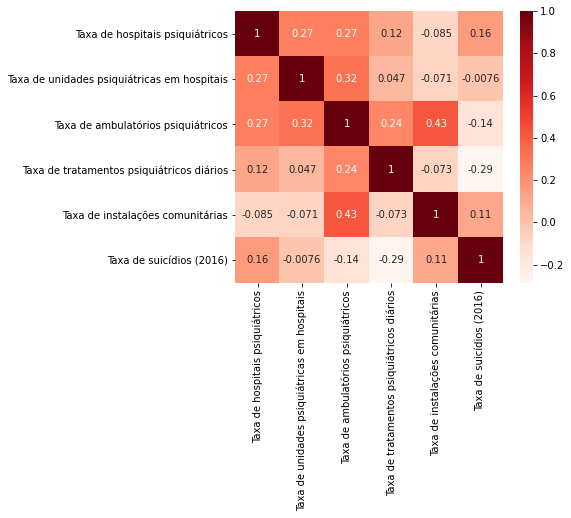

In [ ]:
#exibição de um gráfico de correlação entre variáveis

plt.figure (figsize = (6,5)) 
cor = df_saudeM2016.corr () 
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds) 
plt.show ()

// fazer breve análise acerca dos níveis de correlação observados

In [ ]:
# Exibindo a correlação das demais variáveis com a quantidade (taxa) de hospitais de saúde mental 
corr_taxaHospSM = cor['Taxa de hospitais psiquiátricos']
print(corr_taxaHospSM)

Taxa de hospitais psiquiátricos                1.000000
Taxa de unidades psiquiátricas em hospitais    0.273249
Taxa de ambulatórios psiquiátricos             0.274971
Taxa de tratamentos psiquiátricos diários      0.117629
Taxa de instalações comunitárias              -0.084582
Name: Taxa de hospitais psiquiátricos, dtype: float64


In [ ]:
# Seleção das características altamente correlacionadas, com nível de correlação maior que 0,5
alta_corr = corr_taxaHospSM[(abs(corr_taxaHospSM) > 0.5)] 
print(alta_corr)


Taxa de hospitais psiquiátricos    1.0
Name: Taxa de hospitais psiquiátricos, dtype: float64


--> Ou seja, pelo resultado observado, não houve nenhuma outra variável altamente correlacionada com a taxa de quantiadade de hospitais de saúde mental

In [ ]:
#quantidades de valores de algumas colunas
df_cwb['Sexo'].value_counts()